In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(100)

In [4]:
df = pd.DataFrame(np.random.randn(5,4),['A',"B","C","D", "E"],['W','X','Y','Z'])

In [5]:
df

W         X         Y         Z
A -1.749765  0.342680  1.153036 -0.252436
B  0.981321  0.514219  0.221180 -1.070043
C -0.189496  0.255001 -0.458027  0.435163
D -0.583595  0.816847  0.672721 -0.104411
E -0.531280  1.029733 -0.438136 -1.118318

In [6]:
df>0

W     X      Y      Z
A  False  True   True  False
B   True  True   True  False
C  False  True  False   True
D  False  True   True  False
E  False  True  False  False

In [7]:
# Index Levels 
outside =  ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]

In [8]:
hier_index =list(zip(outside,inside))

In [9]:
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [10]:
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [11]:
df = pd.DataFrame(np.random.randn(6,2), hier_index, ['A','B'] )
df

A         B
G1 1  1.618982  1.541605
   2 -0.251879 -0.842436
   3  0.184519  0.937082
G2 1  0.731000  1.361556
   2 -0.326238  0.055676
   3  0.222400 -1.443217

In [12]:
df.loc['G1'].loc[1]['A']

1.6189816606752596

In [13]:
df.index.names = ['Groups', 'Num']
df

A         B
Groups Num                    
G1     1    1.618982  1.541605
       2   -0.251879 -0.842436
       3    0.184519  0.937082
G2     1    0.731000  1.361556
       2   -0.326238  0.055676
       3    0.222400 -1.443217

In [14]:
df.loc['G2'].loc[2]['B']

0.055676014854776905

In [15]:
df.xs(1,level='Num')

A         B
Groups                    
G1      1.618982  1.541605
G2      0.731000  1.361556

In [16]:
d = {'A':[1,2,np.nan],'B':[5,np.nan, np.nan],'C':[1,2,3]}

In [17]:
df = pd.DataFrame(d)

In [18]:
df

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [19]:
df.dropna()

A    B  C
0  1.0  5.0  1

In [20]:
df.dropna(axis=1)

C
0  1
1  2
2  3

In [21]:
df.dropna(thresh=2)

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2

In [22]:
df.fillna(value='Fill value')

A           B  C
0           1           5  1
1           2  Fill value  2
2  Fill value  Fill value  3

In [23]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [24]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB','FB'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa','Carl', 'Sarah'],
        'Sales':[200,120,340,124,243,350]}
        

In [25]:
df = pd.DataFrame(data)
df

Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350

In [26]:
df1 =df.groupby('Company')

In [27]:
df1.mean()

Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

In [28]:
df1.sum()

Sales
Company       
FB         593
GOOG       320
MSFT       464

In [29]:
df1.std()

Sales
Company            
FB        75.660426
GOOG      56.568542
MSFT     152.735065

In [30]:
df1.sum().loc['FB']


Sales    593
Name: FB, dtype: int64

In [31]:
df1.count()

Person  Sales
Company               
FB            2      2
GOOG          2      2
MSFT          2      2

In [32]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [33]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [34]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [35]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [36]:
pd.concat([df1,df2,df3])

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [37]:
pd.concat([df1,df2,df3], axis=1)

A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11

In [38]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [39]:
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [40]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

In [41]:
pd.merge(left, right,how='inner',on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

In [42]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [43]:
pd.merge(left, right,on=['key1','key2'])

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [44]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

col1  col2 col3
0     1   444  abc
1     2   555  def
2     3   666  ghi
3     4   444  xyz

In [45]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [46]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [47]:
df[(df['col1']>2) & (df['col2']== 444)]

col1  col2 col3
3     4   444  xyz

In [48]:
df['col1']>2


0    False
1    False
2     True
3     True
Name: col1, dtype: bool

In [49]:
def times2(x):
    return x*2

In [50]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [51]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [52]:
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [53]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [54]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [55]:
df.sort_values('col2')

col1  col2 col3
0     1   444  abc
3     4   444  xyz
1     2   555  def
2     3   666  ghi

In [56]:
df.isnull()

col1   col2   col3
0  False  False  False
1  False  False  False
2  False  False  False
3  False  False  False

In [57]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [58]:
df

A    B  C  D
0  foo  one  x  1
1  foo  one  y  3
2  foo  two  x  2
3  bar  two  y  5
4  bar  one  x  4
5  bar  one  y  1

In [59]:
df.pivot_table(values='D', index=['A','B'], columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [60]:
pd.read_csv('example').to_csv('example1', index=False);

In [61]:
pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15

In [62]:
df.to_excel('sss.xlsx', sheet_name='ssss1')

In [63]:
data = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [64]:
type(data)

list

In [65]:
data

[                                         Bank NameBank            CityCity  \
 0                                    Almena State Bank              Almena   
 1                           First City Bank of Florida   Fort Walton Beach   
 2                                 The First State Bank       Barboursville   
 3                                   Ericson State Bank             Ericson   
 4                     City National Bank of New Jersey              Newark   
 5                                        Resolute Bank              Maumee   
 6                                Louisa Community Bank              Louisa   
 7                                 The Enloe State Bank              Cooper   
 8                  Washington Federal Bank for Savings             Chicago   
 9      The Farmers and Merchants State Bank of Argonia             Argonia   
 10                                 Fayette County Bank          Saint Elmo   
 11   Guaranty Bank, (d/b/a BestBank in Georgia & Mi

In [66]:
data[0]

Bank NameBank            CityCity  \
0                                    Almena State Bank              Almena   
1                           First City Bank of Florida   Fort Walton Beach   
2                                 The First State Bank       Barboursville   
3                                   Ericson State Bank             Ericson   
4                     City National Bank of New Jersey              Newark   
5                                        Resolute Bank              Maumee   
6                                Louisa Community Bank              Louisa   
7                                 The Enloe State Bank              Cooper   
8                  Washington Federal Bank for Savings             Chicago   
9      The Farmers and Merchants State Bank of Argonia             Argonia   
10                                 Fayette County Bank          Saint Elmo   
11   Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
12                                      First NBC Bank         New Orleans   
13                                       Proficio Bank  Cottonwood Heights   
14                       Seaway Bank and Trust Company             Chicago   
15                              Harvest Community Bank          Pennsville   
16                                         Allied Bank            Mulberry   
17                        The Woodbury Banking Company            Woodbury   
18                              First CornerStone Bank     King of Prussia   
19                                  Trust Company Bank             Memphis   
20                          North Milwaukee State Bank           Milwaukee   
21                              Hometown National Bank            Longview   
22                                 The Bank of Georgia      Peachtree City   
23                                        Premier Bank              Denver   
24                                      Edgebrook Bank             Chicago   
25                              Doral Bank  En Español            San Juan   
26                   Capitol City Bank & Trust Company             Atlanta   
27                             Highland Community Bank             Chicago   
28                    First National Bank of Crestview           Crestview   
29                                  Northern Star Bank             Mankato   
..                                                 ...                 ...   
533                                  ANB Financial, NA         Bentonville   
534                                          Hume Bank                Hume   
535                             Douglass National Bank         Kansas City   
536                                  Miami Valley Bank            Lakeview   
537                                            NetBank          Alpharetta   
538                          Metropolitan Savings Bank          Pittsburgh   
539                                    Bank of Ephraim             Ephraim   
540                                      Reliance Bank        White Plains   
541              Guaranty National Bank of Tallahassee         Tallahassee   
542                                Dollar Savings Bank              Newark   
543                               Pulaski Savings Bank        Philadelphia   
544              First National Bank of Blanchardville      Blanchardville   
545                              Southern Pacific Bank            Torrance   
546                        Farmers Bank of Cheneyville         Cheneyville   
547                                      Bank of Alamo               Alamo   
548             AmTrade International Bank  En Español             Atlanta   
549                     Universal Federal Savings Bank             Chicago   
550                       Connecticut Bank of Commerce            Stamford   
551                                   New Century Bank     Shelby Township   
552                              Net 1st National Bank         

In [67]:
data[0].head()

Bank NameBank           CityCity StateSt  CertCert  \
0                 Almena State Bank             Almena      KS     15426   
1        First City Bank of Florida  Fort Walton Beach      FL     16748   
2              The First State Bank      Barboursville      WV     14361   
3                Ericson State Bank            Ericson      NE     18265   
4  City National Bank of New Jersey             Newark      NJ     21111   

      Acquiring InstitutionAI Closing DateClosing  FundFund  
0                 Equity Bank    October 23, 2020     10538  
1   United Fidelity Bank, fsb    October 16, 2020     10537  
2              MVB Bank, Inc.       April 3, 2020     10536  
3  Farmers and Merchants Bank   February 14, 2020     10535  
4             Industrial Bank    November 1, 2019     10534

In [68]:
from sqlalchemy  import create_engine
engine = create_engine('sqlite:///:memory:')

In [69]:
df.to_sql('my_table', engine)

In [70]:
pd.read_sql('my_table', con=engine)

index    A    B  C  D
0      0  foo  one  x  1
1      1  foo  one  y  3
2      2  foo  two  x  2
3      3  bar  two  y  5
4      4  bar  one  x  4
5      5  bar  one  y  1

In [71]:
import pandas as pd;

In [72]:
salaries = pd.read_csv('Salaries.csv')
salaries.head(1)

Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18          0.0  400184.25       NaN  567595.43         567595.43   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN

In [73]:
salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [74]:
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [75]:
salaries['BasePay'].mean()

66325.44884050643

In [76]:
salaries['OvertimePay'].max()

245131.88

In [77]:
salaries[salaries['EmployeeName'] == "JOSEPH DRISCOLL"]['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [78]:
salaries[salaries['EmployeeName'] == "JOSEPH DRISCOLL"]['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [79]:
salaries[salaries['TotalPayBenefits'] == salaries['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [80]:
salaries[salaries['TotalPayBenefits'] == salaries['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [81]:
salaries.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [82]:
salaries['JobTitle'].nunique()


2159

In [83]:
salaries['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [84]:
sum(salaries[salaries['Year'] == 2013]['JobTitle'].value_counts() == 1)

202

In [85]:
def chief_string(title):
    if 'chief' in title.lower().split():
        return True;
    else:
        return False;

In [86]:
salaries[salaries['JobTitle'].apply(lambda  x:chief_string(x))]

Id           EmployeeName  \
4            5        PATRICK GARDNER   
5            6         DAVID SULLIVAN   
9           10     JOANNE HAYES-WHITE   
10          11          ARTHUR KENNEY   
25          26           GREGORY SUHR   
28          29         DENISE SCHMITT   
29          30          MONICA FIELDS   
31          32            DAVID SHINN   
42          43        THOMAS SIRAGUSA   
48          49           JAMES DUDLEY   
55          56          KEVIN CASHMAN   
57          58           MARK KEARNEY   
66          67          ROBERT POSTEL   
68          69         THOMAS SHAWYER   
138        139            JESSE SMITH   
139        140        THERESE STEWART   
140        141           MARISA MORET   
196        197        BURK DELVENTHAL   
223        224     BARBARA SCHULTHEIS   
229        230        FRANK CARDINALE   
298        299         JAMES HARRIGAN   
299        300          JOANNE HOEPER   
333        334             LINDA ROSS   
334        335           ROBERT MAERZ   
335        336          DAVID PFEIFER   
398        399     WILLIAM SIFFERMANN   
415        416             SHARON WOO   
448        449            WENDY STILL   
506        507           ROBERT BRYAN   
507        508  JULIA M C FRIEDLANDER   
...        ...                    ...   
120012  120013           Mark A Naddy   
121045  121046        Rolando C Lopez   
122123  122124     Nerivaldo C Santos   
122170  122171           James M Ryan   
122574  122575      Loretta M Cecconi   
123030  123031          Michael G Gay   
124548  124549           Paul H Mabry   
124647  124648         Mark Y Antonio   
125497  125498        Artie L L Kelly   
125525  125526        Tuti I Suardana   
125670  125671          Sylvia N Thai   
125673  125674        Deborah L Brown   
125861  125862            Cuong Quach   
125893  125894           Peter Aviles   
125907  125908        Shahin P Shaikh   
126041  126042      Donald P Margolis   
127965  127966      Sylvia M Selinger   
128030  128031        Janice Gragasin   
131266  131267       Cheryl L Coleman   
131377  131378         Ann M Castillo   
132799  132800      Judith A Boyajian   
133842  133843       Jennifer L Novak   
137010  137011     Ryan L Butterfield   
137168  137169          Tony E Durkee   
137553  137554           Paula Jesson   
138011  138012       Sharon C Jackson   
139620  139621            Anita S Lee   
139709  139710       George D Vaughan   
140080  140081    Patrick W Gillespie   
140156  140157    Christopher L Ochoa   

                                                 JobTitle    BasePay  \
4            DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
5                               ASSISTANT DEPUTY CHIEF II  118602.00   
9                  CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  285262.00   
10       ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  194999.39   
25                                        CHIEF OF POLICE  256470.41   
28                   DEPUTY CHIEF III (POLICE DEPARTMENT)  261717.60   
29           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  246225.60   
31                   DEPUTY CHIEF III (POLICE DEPARTMENT)  254027.63   
42           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  218930.76   
48                   DEPUTY CHIEF III (POLICE DEPARTMENT)  233867.60   
55                   DEPUTY CHIEF III (POLICE DEPARTMENT)  226206.80   
57                              ASSISTANT DEPUTY CHIEF II  217410.80   
66       ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  177914.76   
68                   DEPUTY CHIEF III (POLICE DEPARTMENT)  122974.00   
138     CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)  213907.72   
139     CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)  213907.72   
140     CONFIDENTIAL CHIEF ATTORNEY II (CIVIL & CRIMINAL)  213907.72   
196                   CHIEF ATTORNEY I (CIVIL & CRIMINAL)  206752.00   
223                             ASSISTANT DEPUTY CHIEF II  109667.03   
229                          

In [87]:
salaries['title_len'] = salaries['JobTitle'].apply(lambda x:len(x))

In [88]:
salaries[['TotalPayBenefits','title_len']].corr()

TotalPayBenefits  title_len
TotalPayBenefits          1.000000  -0.036878
title_len                -0.036878   1.000000

In [89]:
e_commerce =  pd.read_csv('Ecommerce Purchases')
e_commerce

Address    Lot AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   
5     7502 Powell Mission Apt. 768\nTravisland, VA 3...  21 XT       PM   
6        93971 Conway Causeway\nAndersonburgh, AZ 75107  96 Xt       AM   
7     260 Rachel Plains Suite 366\nCastroberg, WV 24...  96 pG       PM   
8               2129 Dylan Burg\nNew Michelle, ME 28650  45 JN       PM   
9       3795 Dawson Extensions\nLake Tinafort, ID 88739  15 Ug       AM   
10        650 Elizabeth Park\nLake Maria, LA 13526-2530  65 Yn       PM   
11               349 Laurie Parks\nThomasview, ID 08970  30 kK       PM   
12      733 Heather Rest Apt. 670\nBoltonport, UT 78662  69 DO       AM   
13    118 Melton Via Suite 681\nAlexanderbury, FL 32104  36 bu       PM   
14    8774 Jason Keys Suite 427\nEast Scottborough, ...  70 zH       AM   
15       31730 Chelsea Crest\nBlakemouth, CT 90395-0620  41 Cj       PM   
16    5283 Thomas Trafficway Suite 343\nEast Brittne...  31 ho       AM   
17    950 Jacqueline Village Apt. 592\nPort Kimberly...  23 Rh       PM   
18    461 Christopher Square\nWest Michaelchester, C...  17 SB       PM   
19                  125 Hall Summit\nBoothton, IL 41721  99 CU       PM   
20        7383 George Village\nLake Jamesview, CO 79828  23 dk       PM   
21    282 Miller Valleys Suite 404\nWilkinsonbury, M...  24 RZ       AM   
22     625 Laura Summit Suite 112\nShortmouth, AK 97156  45 oa       PM   
23    25292 Shepherd Trail Apt. 798\nRussellmouth, S...  31 pS       PM   
24                Unit 3046 Box 3197\nDPO AE 61496-4172  62 Ac       AM   
25    80797 Ryan Trail Apt. 752\nAaronhaven, MI 0622...  66 SO       PM   
26          5334 Sheppard Fort\nNorth Kirsten, ND 71170  40 ND       AM   
27           5015 Smith Harbors\nSouth Ashley, OK 81283  34 JQ       PM   
28    50533 Cooper Cliffs\nNorth Jonathanberg, MD 20482  17 kP       PM   
29    30755 Joshua Plaza Apt. 567\nWest Susanton, FM...  93 OP       PM   
...                                                 ...    ...      ...   
9970              0060 Keith Stream\nWestport, CO 47097  11 nt       PM   
9971  5806 Martinez Point\nLake Abigailstad, MD 6183...  07 wl       AM   
9972  89504 Flynn Overpass Suite 822\nNew Elijah, WV...  23 eL       AM   
9973     92126 Daniel Streets\nNorth Patricia, IA 10477  04 QN       PM   
9974     500 Powell Rapid Apt. 114\nClarkfort, FL 70488  48 is       AM   
9975  5208 Hanson Trail Suite 527\nSouth Jonathanshi...  67 OX       PM   
9976  5419 Cruz Island Apt. 033\nLake Todd, AK 24863...  93 FM       PM   
9977  02182 Keith Expressway\nEast Shannon, CT 20578...  34 RL       AM   
9978   991 Watts Court\nSouth Danielstad, IA 39032-8865  66 eb       AM   
9979  00490 Joseph Haven Apt. 149\nWest Keithfurt, S...  69 XK       PM   
9980           6061 Dave Lights\nPhillipsview, UT 40500  25 Mv       AM   
9981  087 Larson Roads Apt. 587\nRicestad, WI 98077-...  95 Kw       AM   
9982  18044 Mcintosh Row Apt. 122\nLake Jennifer, NC...  77 uq       PM   
9983              PSC 5678, Box 4503\nAPO AP 94998-5546  79 cd       AM   
9984       7560 Boyle Keys\nAntoniomouth, DC 00522-0367  72 Qb       AM   
9985              7456 Stevens Rest\nEricside, FL 16389  27 Yv       PM   
9986  2719 Troy Drive Suite 062\nLisachester, PW 414...  80 Wl       PM   
9987     2754 Klein Mission\nJohnsonview, PA 64925-9624  65 Fg       PM   
9988      0154 Green Forest\nNew Timothy, IL 33670-4620  11 MC       AM   
9989         5674 Cruz Trace\nNew Shelby, KY 51047-5469  12 Kf       AM   
9990  75731 Molly Springs\nWest Danielle, VT 96934-5102  93 ty       PM   
9991              PSC 8165, Box 8498\nAPO AP 60327-0346  50 dA       AM  

In [90]:
e_commerce.head()


Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams and Pham      675957666125       08/19   
3  Williams, Marshall and Buchanan  6011578504430710       02/24   
4        Brown, Watson and Andrews  6011456623207998       10/25   

   CC Security Code                  CC Provider  \
0               900                 JCB 16 digit   
1               561                   Mastercard   
2               699                 JCB 16 digit   
3               384                     Discover   
4               678  Diners Club / Carte Blanche   

                            Email                                     Job  \
0               pdunlap@yahoo.com  Scientist, product/process development   
1              anthony41@reed.com                       Drilling engineer   
2  amymiller@morales-harrison.com                Customer service manager   
3     brent16@olson-robinson.info                       Drilling engineer   
4     christopherwright@gmail.com                             Fine artist   

        IP Address Language  Purchase Price  
0  149.146.147.205       el           98.14  
1     15.160.41.51       fr           70.73  
2   132.207.160.22       de            0.95  
3     30.250.74.19       es           78.04  
4     24.140.33.94       es           77.82

In [91]:
len(e_commerce.index)

10000

In [92]:
len(e_commerce.columns)

14

In [93]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [94]:
e_commerce['Purchase Price'].mean()

50.34730200000025

In [95]:
e_commerce['Purchase Price'].max()

99.99

In [96]:
e_commerce['Purchase Price'].min()

0.0

In [97]:
len(e_commerce[e_commerce['Language']=='en'])

1098

In [98]:
e_commerce[e_commerce['Language']=='en']['Language'].count()

1098

In [99]:
e_commerce[e_commerce['Job']=='Lawyer']['Job'].count()

30

In [100]:
e_commerce['AM or PM'].value_counts() 

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [101]:
e_commerce['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
Name: Job, dtype: int64

In [102]:
e_commerce[e_commerce['Lot']=='90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

In [103]:
e_commerce[e_commerce['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

In [104]:
e_commerce[(e_commerce['CC Provider']=='American Express') & (e_commerce['Purchase Price']>95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

In [105]:
e_commerce[e_commerce['CC Exp Date'].apply(lambda x:x[3:]) =='25'].count()

Address             1033
Lot                 1033
AM or PM            1033
Browser Info        1033
Company             1033
Credit Card         1033
CC Exp Date         1033
CC Security Code    1033
CC Provider         1033
Email               1033
Job                 1033
IP Address          1033
Language            1033
Purchase Price      1033
dtype: int64

In [106]:
e_commerce['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [107]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
x= np.linspace(0,5,11)
y = x**2

In [110]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Text(0.5, 1.0, 'Title ')

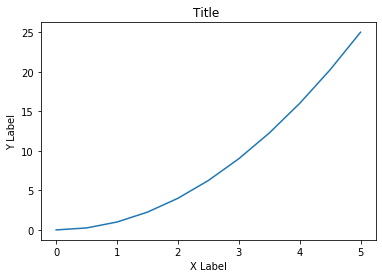

In [111]:
plt.plot(x, y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title ')


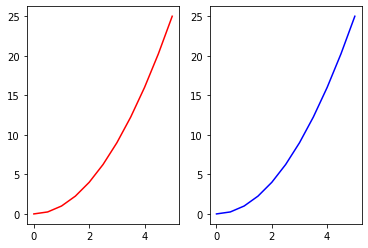

In [112]:
plt.subplot(1,2, 1)
plt.plot(x,y,'r-')

plt.subplot(1,2,2)
plt.plot(x,y,'b-')

Text(0.5, 1.0, 'Set Title')

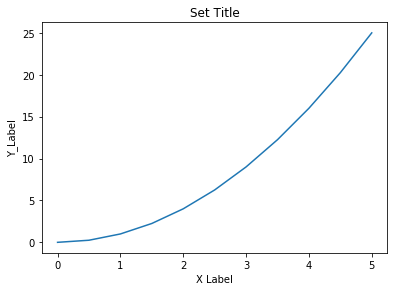

In [113]:
fig =  plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
axes.set_xlabel('X Label')
axes.set_ylabel('Y_Label')
axes.set_title('Set Title')

Text(0.5, 1.0, 'smaller plot')

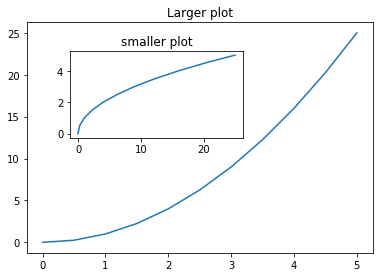

In [114]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y)
axes1.set_title('Larger plot')
axes2.plot(y,x)
axes2.set_title('smaller plot')

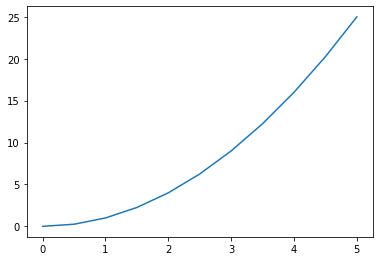

In [115]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes1.plot(x,y)



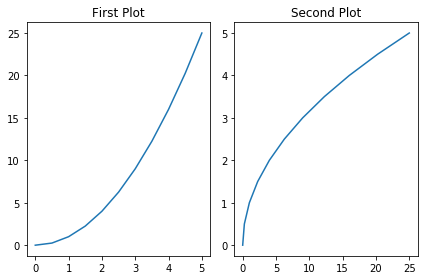

In [116]:
fig,axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,y)
axes[0].set_title("First Plot")

axes[1].plot(y,x)
axes[1].set_title("Second Plot")

plt.tight_layout()

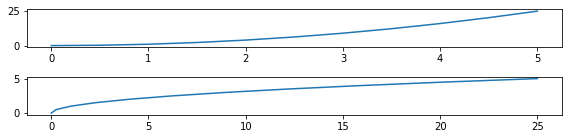

In [117]:
fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(8,2))
axes[0].plot(x,y)
axes[1].plot(y,x)
plt.tight_layout()

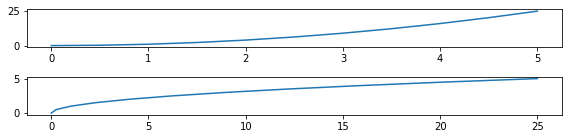

In [118]:
fig

In [119]:
fig.savefig('my_picture.png', dpi=100)

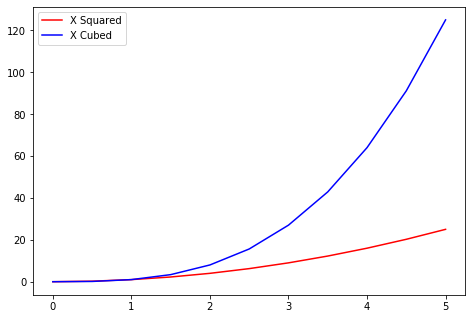

In [120]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2, 'r-',label = 'X Squared')
ax.plot(x, x**3,'b-', label = 'X Cubed')

ax.legend()

(0, 2)

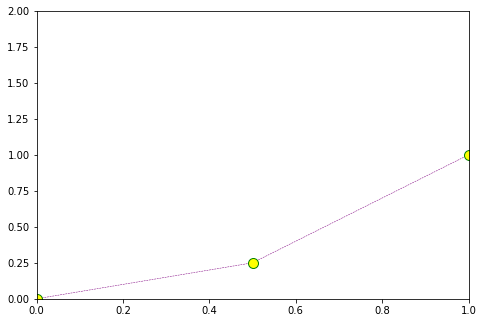

In [121]:
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])

ax.plot(x,y, color='purple', lw=0.5, ls='--', marker='o', markersize=10,
        markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='green')

ax.set_xlim([0,1])
ax.set_ylim([0,2])

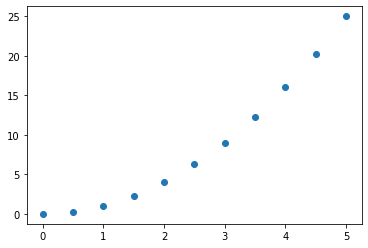

In [122]:
plt.scatter(x, y)

In [123]:
x= np.arange(0,100)
y = x*2
z= x**2

Text(0.5, 1.0, 'title')

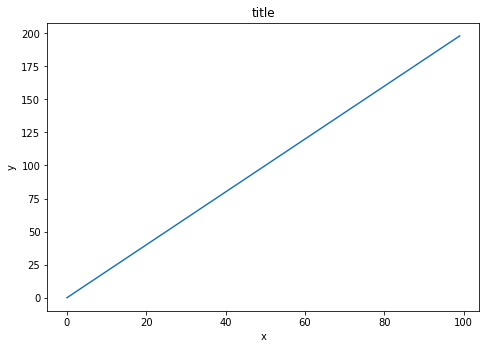

In [124]:
import matplotlib.pyplot  as plt
fig = plt.figure()
axes=  fig.add_axes([0,0,1,1])
axes.plot(x,y)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Text(0.5, 1.0, 'title')

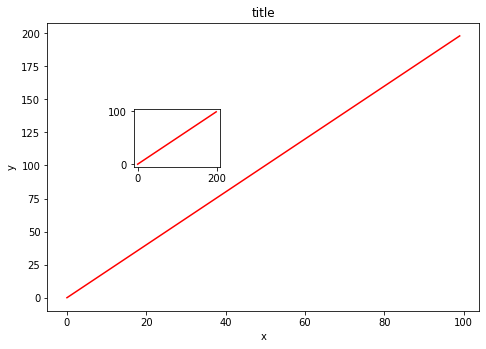

In [125]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.2,0.2])

ax1.plot(x,y, color='red')
ax2.plot(y,x, color='red')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

(32, 50)

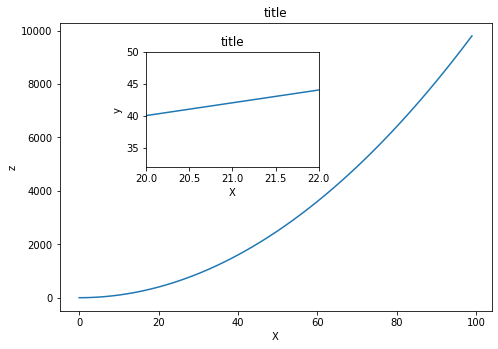

In [126]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.4,0.4])

ax1.plot(x,z)
ax1.set_xlabel("X")
ax1.set_ylabel("z")
ax1.set_title('title')



ax2.plot(x,y)
ax2.set_xlabel("X")
ax2.set_ylabel("y")
ax2.set_title('title')
ax2.set_xlim([20,22])
ax2.set_ylim([32,50])

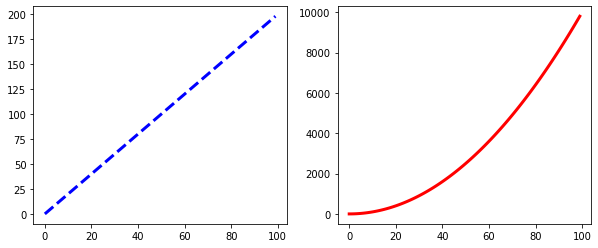

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axes[0].plot(x,y, color ='blue', lw=3, ls='--')


axes[1].plot(x,z, color ='r', lw=3)

In [128]:
import seaborn as sns 

In [129]:
tips = sns.load_dataset('tips')

In [130]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

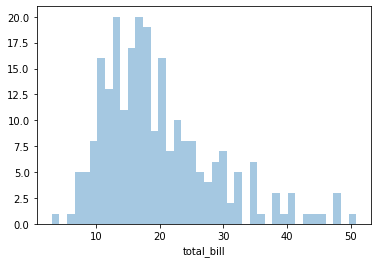

In [131]:
sns.distplot(tips['total_bill'], kde = False, bins= 40)

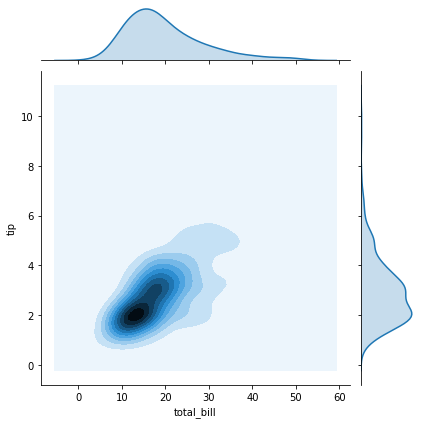

In [132]:
sns.jointplot(x='total_bill',y='tip', data =tips, kind = 'kde')

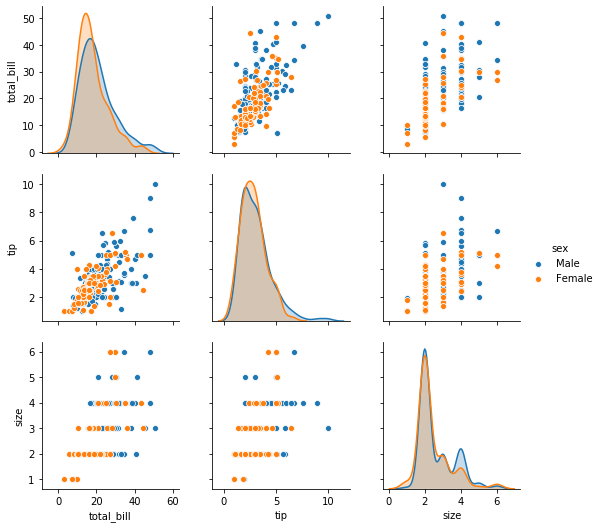

In [133]:
sns.pairplot(tips, hue='sex')

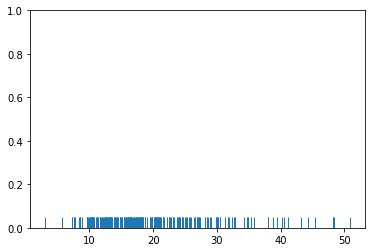

In [134]:
sns.rugplot(tips['total_bill'])

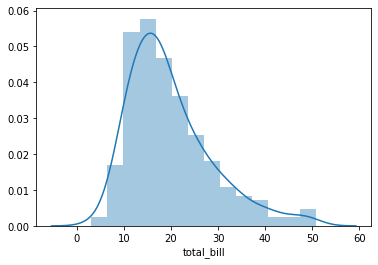

In [135]:
sns.distplot(tips['total_bill'])

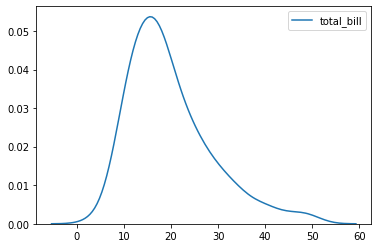

In [136]:
sns.kdeplot(tips['total_bill'])

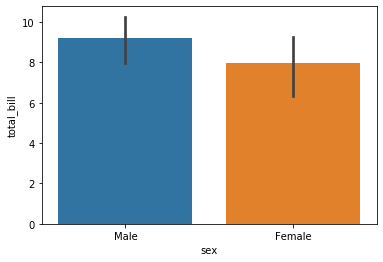

In [137]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator= np.std)

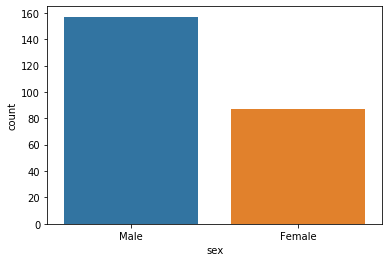

In [138]:
sns.countplot(x='sex', data=tips)

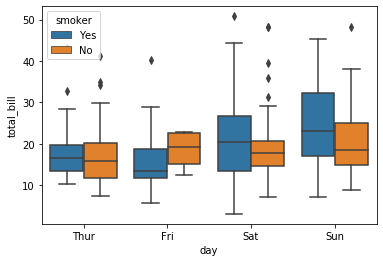

In [139]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

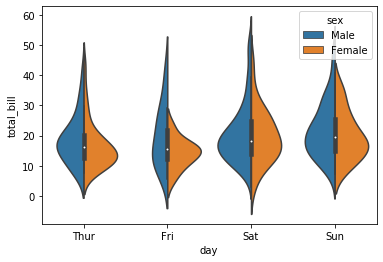

In [140]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

C:\Users\Ammar\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


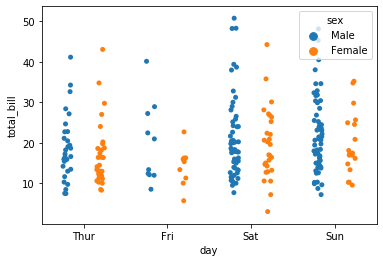

In [141]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue= 'sex', split= True)

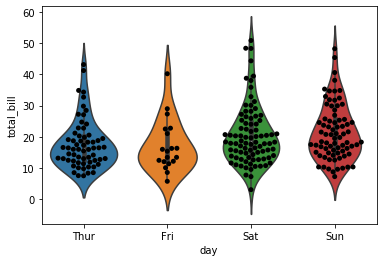

In [142]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day',y='total_bill', data=tips, color='black')


C:\Users\Ammar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


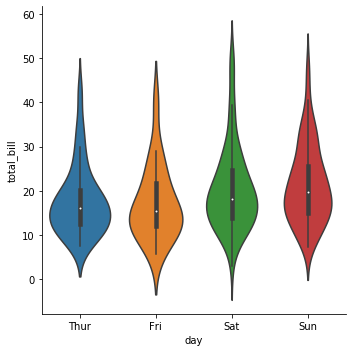

In [143]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

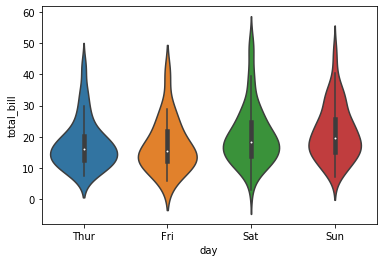

In [144]:
sns.violinplot(x='day', y='total_bill', data=tips,size=(180,12))

In [145]:
flights = sns.load_dataset('flights')


In [146]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [147]:
tc = tips.corr()


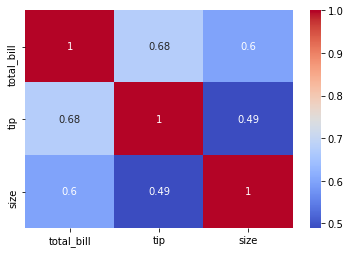

In [148]:
sns.heatmap(tc, annot = True, cmap='coolwarm')

In [149]:
flights

year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         172
29   1951       June         178
..    ...        ...         ...
114  1958       July         491
115  1958     August         505
116  1958  September         404
117  1958    October         359
118  1958   November         310
119  1958   December         337
120  1959    January         360
121  1959   February         342
122  1959      March         406
123  1959      April         396
124  1959        May         420
125  1959       June         472
126  1959       July         548
127  1959     August         559
128  1959  September         463
129  1959    October         407
130  1959   November         362
131  1959   December         405
132  1960    January         417
133  1960   February         391
134  1960      March         419
135  1960      April         461
136  1960        May         472
137  1960       June         535
138  1960       July         622
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

In [150]:
fp = flights.pivot(index = 'month', columns= 'year', values= 'passengers')

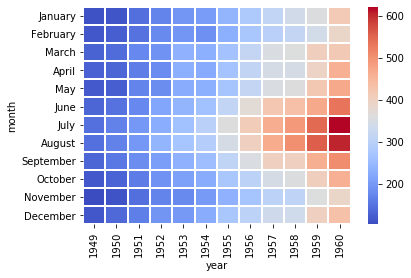

In [151]:
sns.heatmap(fp, cmap='coolwarm', linecolor='white' , linewidths=1 )

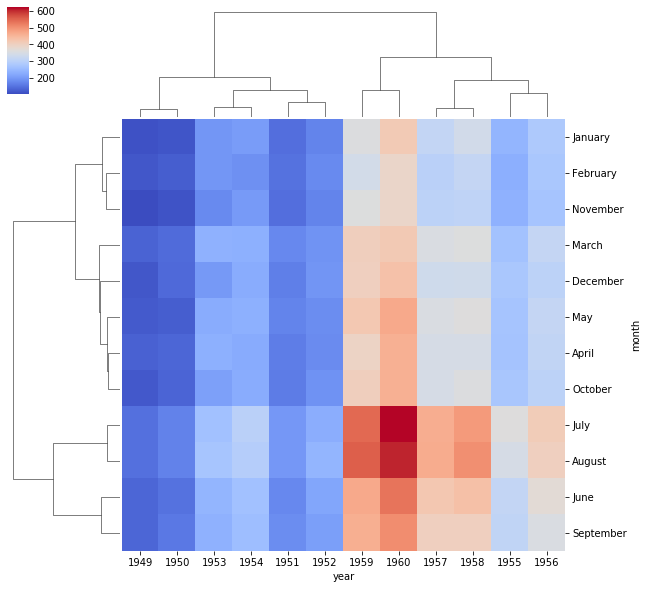

In [152]:
sns.clustermap(fp, cmap='coolwarm')

In [153]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [154]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

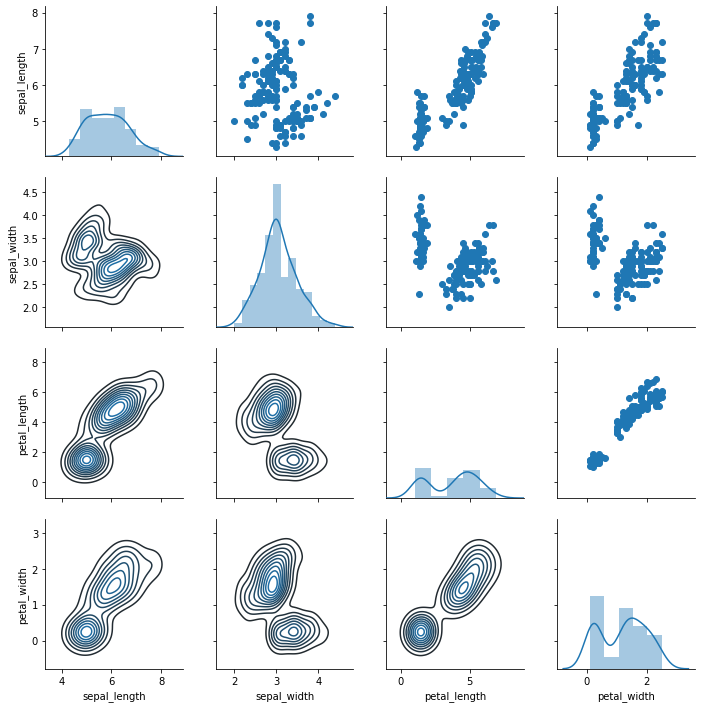

In [155]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

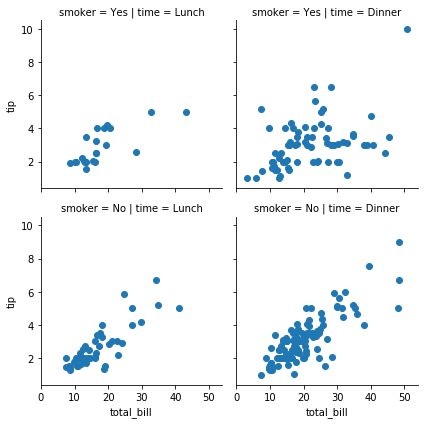

In [156]:
g = sns.FacetGrid(data= tips, col='time' , row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

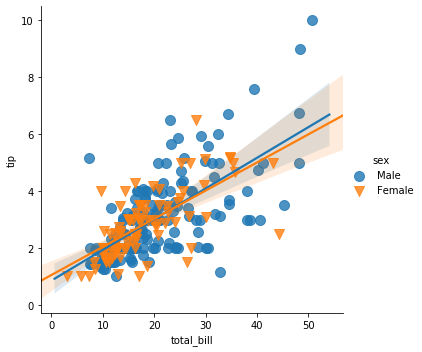

In [157]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], 
        scatter_kws={'s':100})

C:\Users\Ammar\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


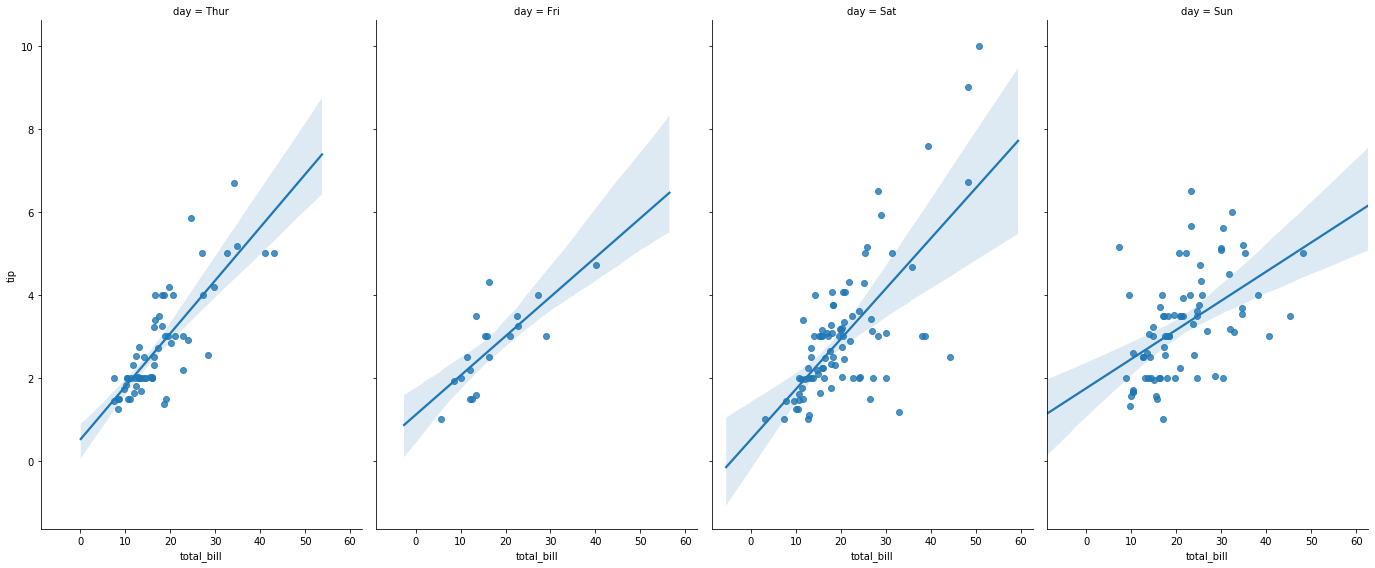

In [158]:
sns.lmplot(x='total_bill', y='tip', data = tips,col='day', 
           aspect=0.6, size = 8)

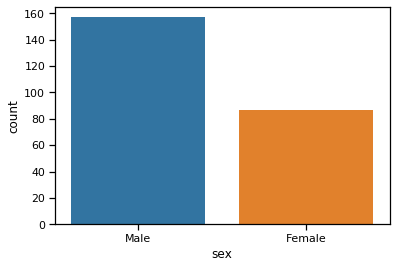

In [159]:
sns.set_context('notebook', font_scale=1)
sns.countplot(x='sex', data=tips)


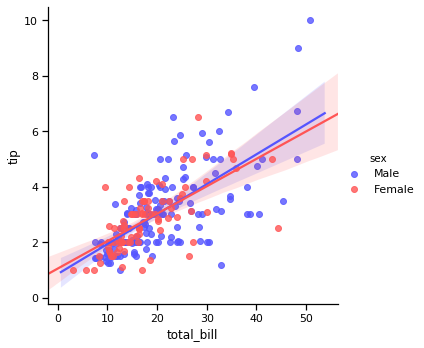

In [160]:
sns.lmplot(x='total_bill', y='tip', data= tips, hue='sex', palette='seismic')

In [161]:
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')

In [162]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

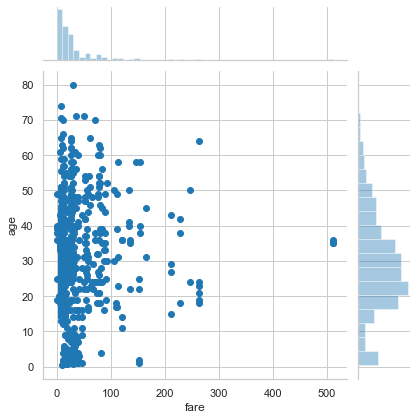

In [163]:
sns.jointplot(x='fare' ,y= 'age', data = titanic)

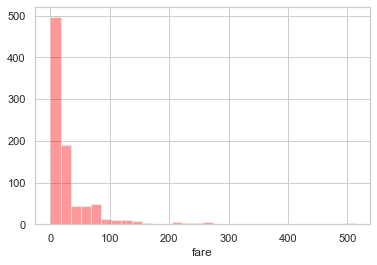

In [164]:
sns.distplot(titanic['fare'], kde = False, color='red', bins=30)

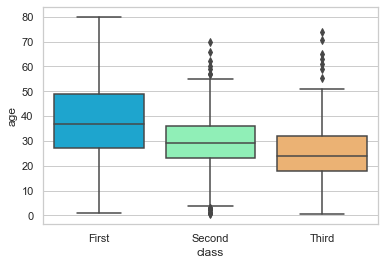

In [165]:
sns.boxplot(x='class',y='age', data= titanic, palette= 'rainbow')

C:\Users\Ammar\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Ammar\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


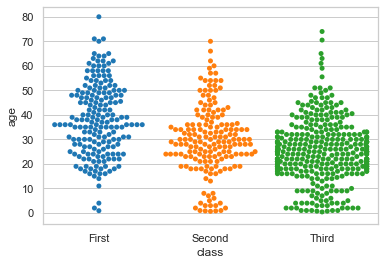

In [166]:
sns.swarmplot(x='class', y= 'age', data=  titanic)

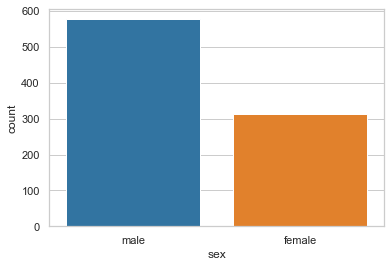

In [167]:
sns.countplot('sex', data= titanic)

Text(0.5, 1, 'titanic Corr')

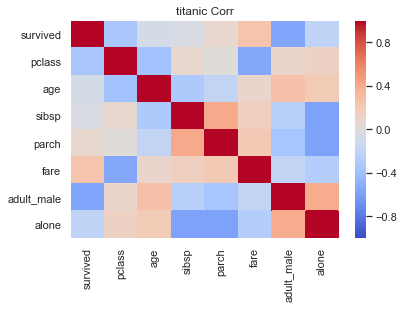

In [168]:
titanicCorr = titanic.corr()
sns.heatmap(titanicCorr,vmin=-1, vmax=1, cmap='coolwarm')
plt.title('titanic Corr')

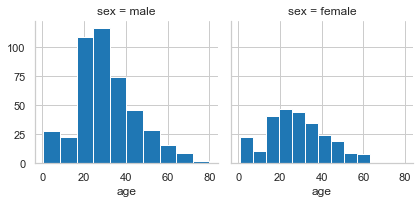

In [169]:
g = sns.FacetGrid(data =titanic,col='sex')
g.map(plt.hist, 'age')

In [1]:
import pandas as pd 

In [172]:
df1 = pd.read_csv('df1',index_col=0)
df1.head()

Unnamed: 0         A         B         C         D
0  2000-01-01  1.339091 -0.163643 -0.646443  1.041233
1  2000-01-02 -0.774984  0.137034 -0.882716 -2.253382
2  2000-01-03 -0.921037 -0.482943 -0.417100  0.478638
3  2000-01-04 -1.738808 -0.072973  0.056517  0.015085
4  2000-01-05 -0.905980  1.778576  0.381918  0.291436

In [177]:
df2 = pd.read_csv('df2')
df2.head()

a         b         c         d
0  0.039762  0.218517  0.103423  0.957904
1  0.937288  0.041567  0.899125  0.977680
2  0.780504  0.008948  0.557808  0.797510
3  0.672717  0.247870  0.264071  0.444358
4  0.053829  0.520124  0.552264  0.190008

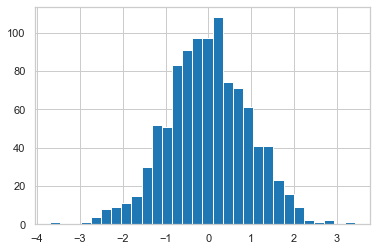

In [180]:
df1['A'].hist(bins=30)

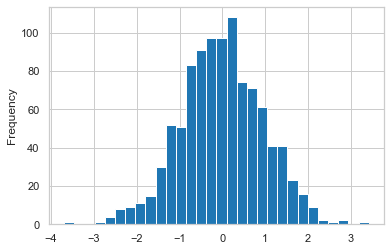

In [184]:
df1['A'].plot.hist(bins=30)

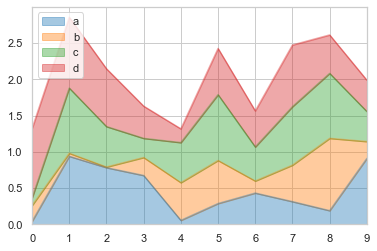

In [186]:
df2.plot.area(alpha=0.4)

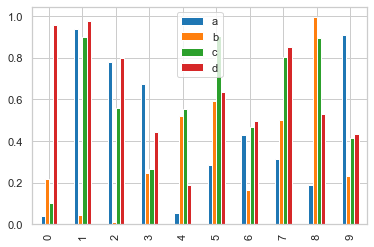

In [187]:
df2.plot.bar()

In [188]:
df2

a         b         c         d
0  0.039762  0.218517  0.103423  0.957904
1  0.937288  0.041567  0.899125  0.977680
2  0.780504  0.008948  0.557808  0.797510
3  0.672717  0.247870  0.264071  0.444358
4  0.053829  0.520124  0.552264  0.190008
5  0.286043  0.593465  0.907307  0.637898
6  0.430436  0.166230  0.469383  0.497701
7  0.312296  0.502823  0.806609  0.850519
8  0.187765  0.997075  0.895955  0.530390
9  0.908162  0.232726  0.414138  0.432007

In [206]:
df1.plot.line(x=df1.index, y='B', figsize=(12,3), lw =1)

KeyError: 'None of [RangeIndex(start=0, stop=1000, step=1)] are in the [columns]'

C:\Users\Ammar\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


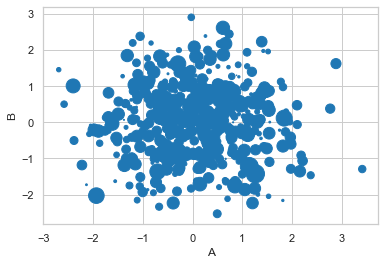

In [212]:
df1.plot.scatter(x='A', y='B',s=df1['C']*100)

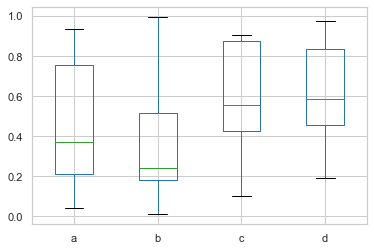

In [213]:
df2.plot.box()

In [214]:
df = pd.DataFrame(np.random.randn(1000,2), columns=['a', 'b'])

In [217]:
df.head()

a         b
0 -0.661938  3.465227
1  0.391439  0.327245
2 -0.311347 -1.424656
3 -0.624872 -0.109995
4  0.952959 -0.983363

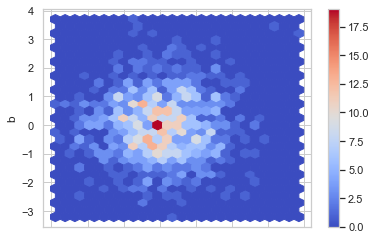

In [223]:
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='coolwarm')

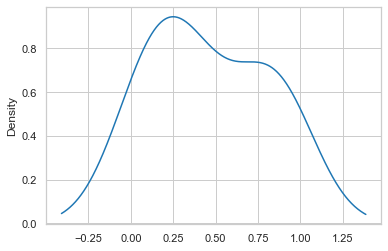

In [224]:
df2['a'].plot.kde()

In [225]:
df3 = pd.read_csv('df3')

In [226]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
a    500 non-null float64
b    500 non-null float64
c    500 non-null float64
d    500 non-null float64
dtypes: float64(4)
memory usage: 15.7 KB


In [227]:
df3.head()

a         b         c         d
0  0.336272  0.325011  0.001020  0.401402
1  0.980265  0.831835  0.772288  0.076485
2  0.480387  0.686839  0.000575  0.746758
3  0.502106  0.305142  0.768608  0.654685
4  0.856602  0.171448  0.157971  0.321231

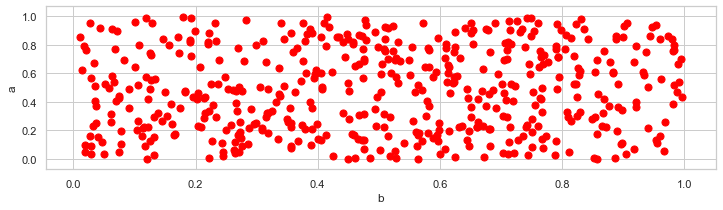

In [233]:
df3.plot.scatter(x='b', y='a', color='red', figsize=(12,3), s=50)

In [236]:
plt.style.use('ggplot')

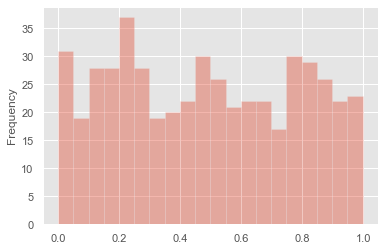

In [238]:
df3['a'].plot.hist(bins =20 , alpha=0.4)

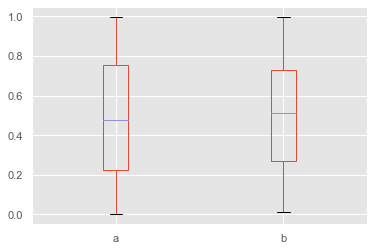

In [240]:
df3[['a','b']].plot.box()

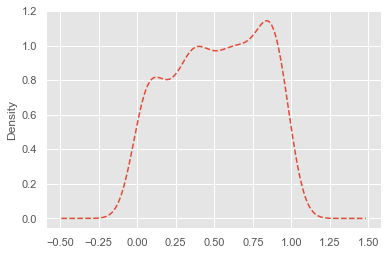

In [245]:
df3['d'].plot.kde(ls='--')

C:\Users\Ammar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


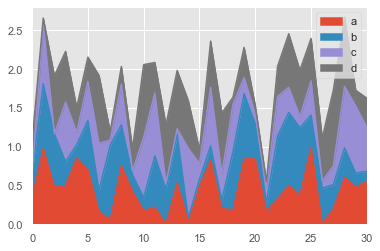

In [246]:
df3.ix[0:30].plot.area(alpha=0.6)